# Exploratory Data Analysis
Churn

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
df = pd.read_csv('Telco_churn.csv')

In [146]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
df.shape

(7043, 21)

In [148]:
# Columns/features 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [149]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [150]:
# Descriptive statstics of numerical variable
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [151]:
# Total count of churned vs not churned
(df['Churn'].value_counts()/len(df))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- Data is highly imbalanced 
- So need to analyze the variables


In [152]:
# Finding the null value
[feature for feature in df.columns if df[feature].isnull().sum()>1]

[]

## Data cleaning
- It's always a good prictise to convert the numerical variable into the respective datatype like int, float..

In [153]:
# Creating copy of data for manipulation and processing

df_cl = df.copy()

In [154]:
# Converting numric feature into the int or float
# Executed df_cl.TotalCharges.astype(int) but got error so there are values who's base is not equal to 10

df_cl.TotalCharges = pd.to_numeric(df_cl.TotalCharges, errors='coerce') 

# Above line of code sets the values having base other than 10 to the NaN so that we can easily identify the null value

In [155]:
df_cl.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [156]:
df_cl[df_cl['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Missing value treatment

In [157]:
print(df_cl['TotalCharges'].mean())
df_cl['TotalCharges'] = df_cl['TotalCharges'].fillna(df_cl['TotalCharges'].mean())

# To drop the NaN values
# df_cl.dropna(how = 'any', inplace = True)

2283.3004408418656


In [158]:
df_cl[df_cl['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- Dividing customers into bins based on the tenure

In [159]:
# Getting the maximum tenure
df_cl['tenure'].max()

72

In [160]:
# Grouping the tenure in the bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [161]:
# Converting from contineous variable to categorical

df_cl['tenure_group'] = pd.cut(df_cl.tenure, range(1, 80, 12), right = False, labels = labels)

In [162]:
df_cl.tenure_group

0        1 - 12
1       25 - 36
2        1 - 12
3       37 - 48
4        1 - 12
         ...   
7038    13 - 24
7039    61 - 72
7040     1 - 12
7041     1 - 12
7042    61 - 72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

- Removing columns which are not usefull for the analysis

In [163]:
# Droping the customer id and tenure feature

df_cl.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)

In [164]:
df_cl.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

- Univariant analysis

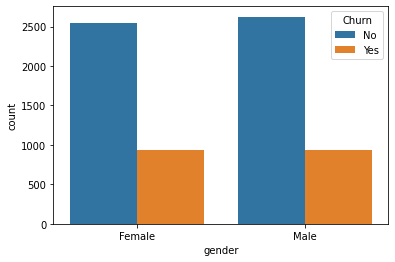

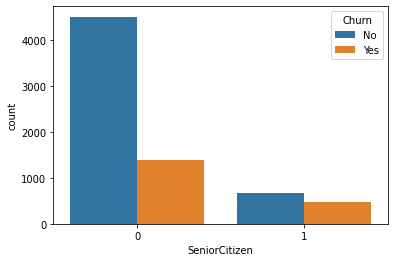

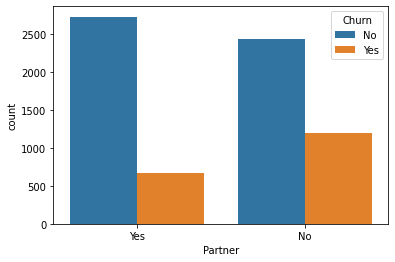

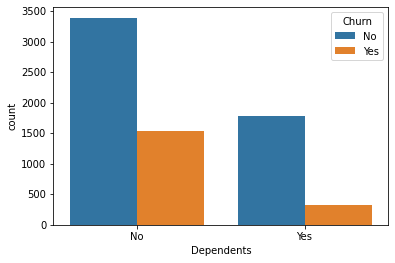

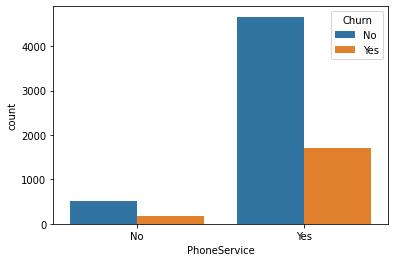

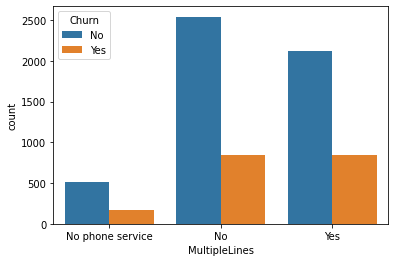

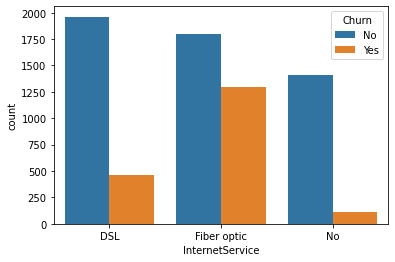

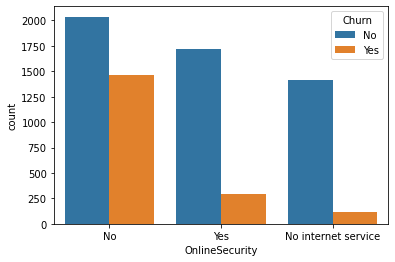

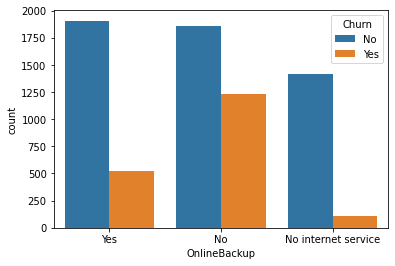

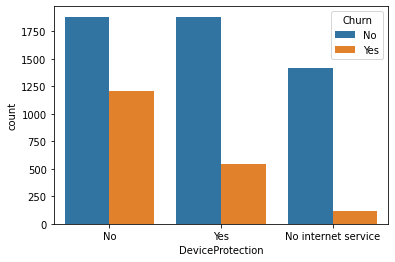

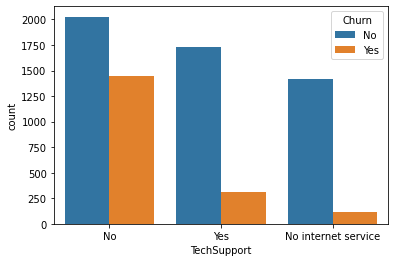

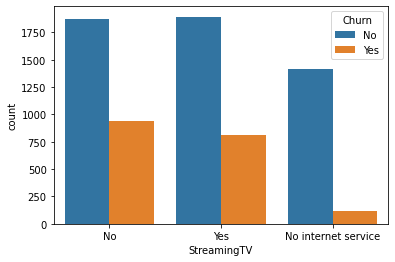

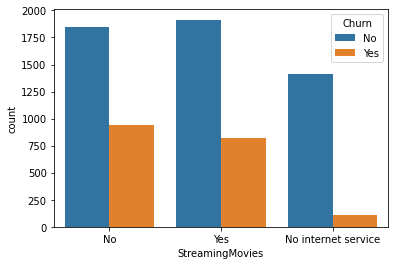

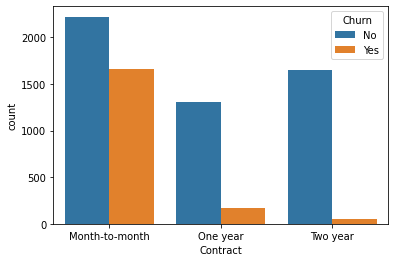

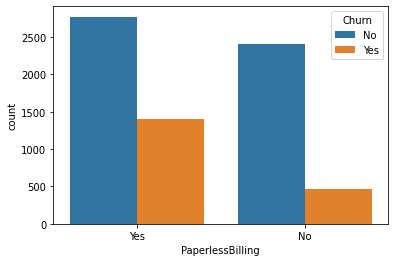

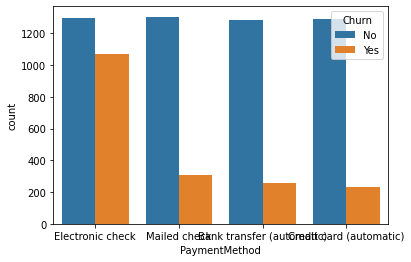

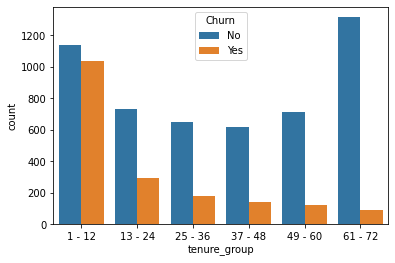

In [165]:
for i, predictor in enumerate(df_cl.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df_cl, x=predictor, hue = 'Churn')

- Converting churn into binary variable i.e 1 or 0

In [166]:
df_cl['Churn'] = np.where(df_cl['Churn'] == 'Yes', 1, 0)

In [167]:
df_cl.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Converting categorical variable into dummy

In [168]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

- Label encoding to be done to only the output and other feature one hot encoding to be done
- One variable is ignored to avoid dummy trap by doing drop_first_ = True

In [169]:
df_dummies = pd.get_dummies(df_cl, drop_first = True)

In [170]:
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


- Relation between total charges and monthly charges

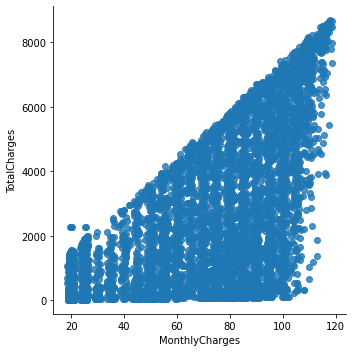

In [171]:
sns.lmplot(data = df_dummies, x ='MonthlyCharges', y ='TotalCharges' , fit_reg=False)

- Total charges increase as monthly charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

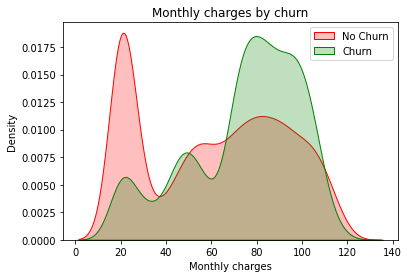

In [172]:
# Churn by monthly charges and total charges
# Plot univariant or bivariant distribution using kernel density estimation

Mth = sns.kdeplot(df_dummies['MonthlyCharges'][(df_dummies['Churn'] == 0)], color = 'Red', shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] == 1)],ax = Mth, color = 'Green', shade = True)

Mth.legend(['No Churn', 'Churn'], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly charges')
Mth.set_title('Monthly charges by churn')

- Building co-relation of all parameters w.r.t churn

<AxesSubplot:>

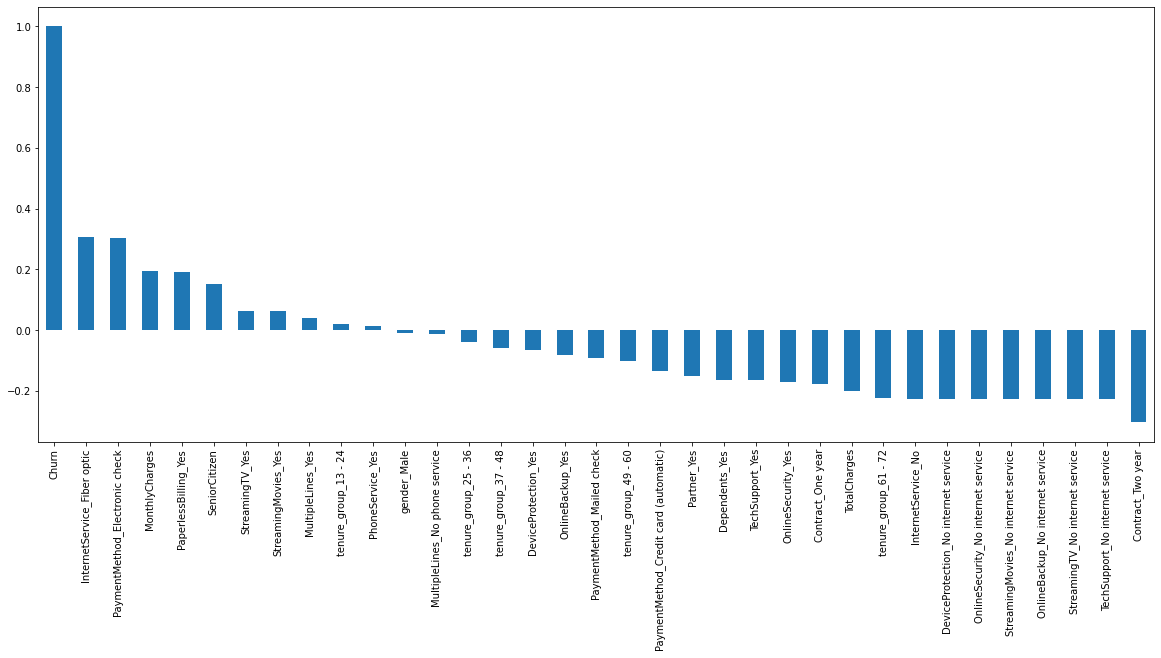

In [181]:
plt.figure(figsize = (20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

### Observations
- High churners are  Month to month contract, first year subscription
- Low churners are those with two_year contarct, subscribers of group 5 year
- Gender has very less contribution in prediction

<AxesSubplot:>

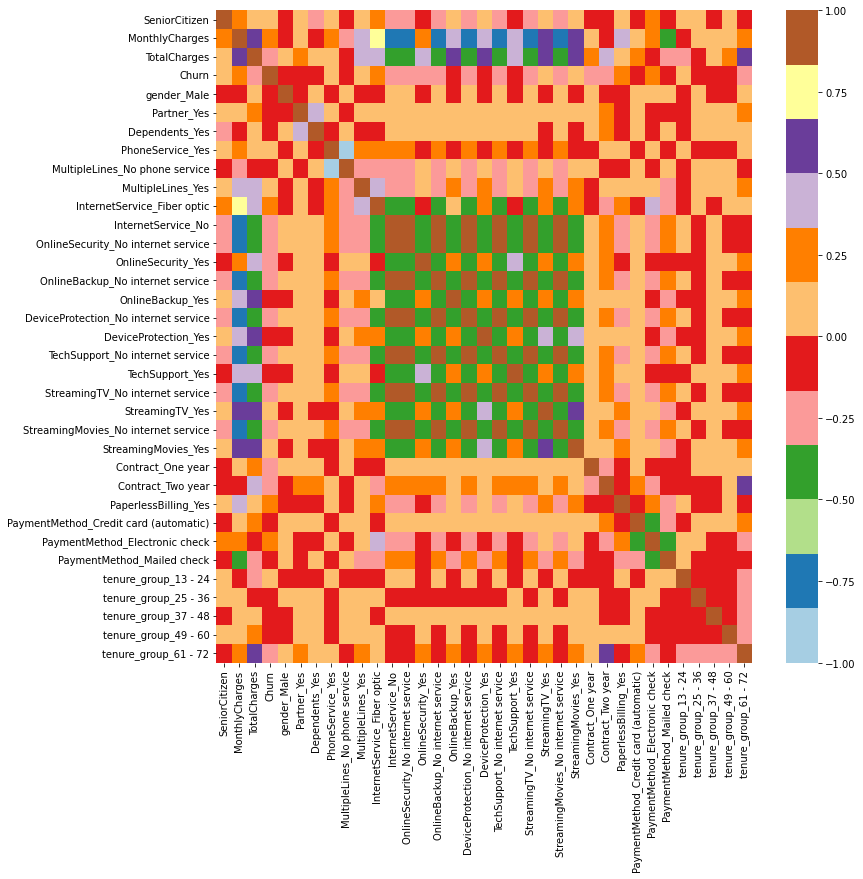

In [184]:
# Heatmap of correlation

plt.figure(figsize = (12,12))
sns.heatmap(df_dummies.corr(), cmap = 'Paired')

## Bivariant Analysis

In [185]:
churn_yes = df_dummies[df_dummies['Churn'] == 1]
Churn_no = df_dummies[df_dummies['Churn'] == 0]

In [186]:
def bia(data, col, title, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('text')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    

In [187]:
df_dummies.to_csv('train.csv')